<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_5/les_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as scio
from sklearn.inspection import permutation_importance

from sklearn import svm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

1️⃣ **How SVM Works?**
SVM finds the best separating hyperplane that maximizes the margin between different classes in a dataset.

**Margin**: The distance between the separating hyperplane and the closest data points (called support vectors).

**Support Vectors**: The data points that define the margin.

**Kernel Trick**: SVM can transform non-linearly separable data into higher dimensions where a linear separator exists.

✅ Key advantage: Works well with small to medium-sized datasets with complex decision boundaries.



In [9]:
# Завантажити Titanic dataset напряму
!wget -O train.csv https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv


--2025-02-05 14:31:32--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-02-05 14:31:32 (4.56 MB/s) - ‘train.csv’ saved [60302/60302]



In [32]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Завантажити Titanic dataset з seaborn
df_titanik = sns.load_dataset("titanic")
df_titanik.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df.loc[:, 'Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [36]:
df['Age'].isna().sum()

177

In [37]:
df.loc[:, 'Age'].fillna(df['Age'].median(), inplace=True)


In [38]:
df['Age'].isna().sum()

0

In [41]:
# Визначаємо X (ознаки) та y (цільова змінна)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Розбиваємо на навчальні та тестові дані (80% тренувальні, 20% тестові)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
# Створюємо модель SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Навчаємо модель
model.fit(X_train, y_train)


SVC()

In [47]:
# Робимо передбачення
y_pred = model.predict(X_test)

# Дивимося на точність
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Виводимо детальні метрики
print(classification_report(y_test, y_pred))


Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



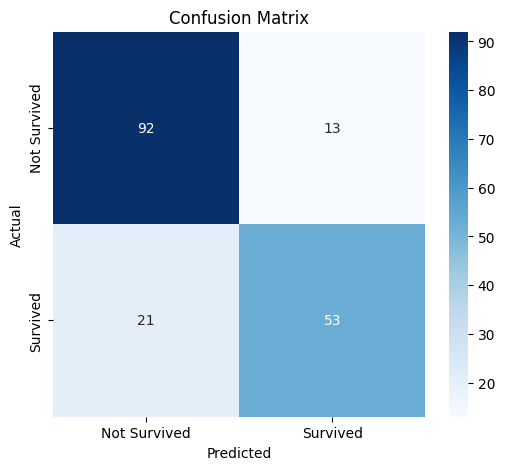

In [48]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

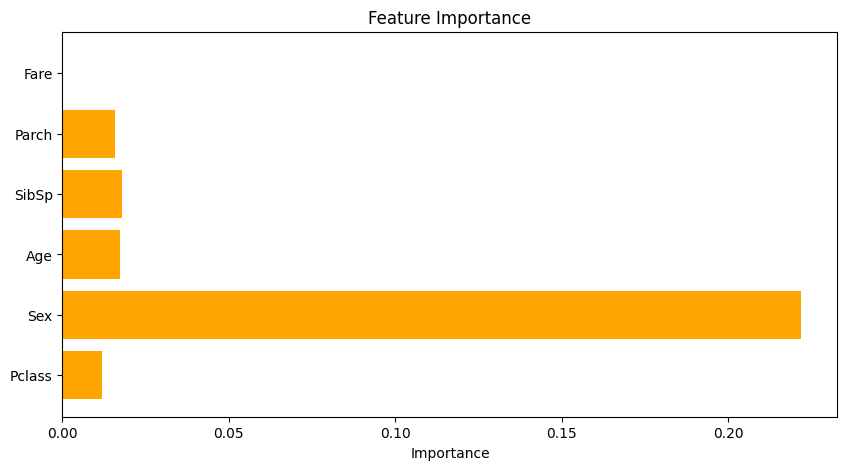

In [50]:
# Get feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Plotting feature importance
plt.figure(figsize=(10, 5))
plt.barh(X.columns, importance, color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()